<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/raw/master/img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='admissions'></a>admissions table
This table contains all admissions and demographic data of the patients admitted to the intensive care unit (ICU, Dutch abbreviation: IC) or medium care unit (MCU, high dependency unit, Dutch abbreviation: MC).

**Note**: reason for admission can be found by examining the Apache II diagnostic categories from the [listitems](listitems.ipynb#apache) table.

## Fields

|Name|Type|Description|
|:---|:---|:---|
|patientid|integer|unique value to identify individual patients throughout their admission(s)|
|admissionid|integer|unique value to identify the admission to the ICU. Patients may have multiple admissionid's during the same or another hospitalization, when they are discharge from the ICU or MC unit. Admissionid is used as an identifier in all other tables.|    
|admissioncount|integer|for each patient, each additional ICU/MCU admission will increase this counter by one|    
|[location](#location)|string|the department the patient has been admitted to, either *IC*, *MC* or both *(IC&MC or MC&IC)*|
|[urgency](#urgency)|bit|determines wheter the admission was urgent (1) (i.e. unplanned) or not (0) (planned)|
|[origin](#origin)|string|department the patient originated from (e.g. Emergency department, regular ward)|
|admittedat|integer|number of milliseconds since the first admission. For the first admission this is set to zero.|
|[admissionyeargroup](#admissionyeargroup)|string|year of admission, categorised|
|dischargedat|integer|time of discharge in number of milliseconds since the first admission|    
|lengthofstay|integer|length of stay of the admission in hours|    
|[destination](#destination)|string|department the patient has been discharged to or 'Overleden' if the patient died during the ICU/MCU admission|
|[gender](#gender)|string|gender, 'Man' for male, 'Vrouw' for female|
|[agegroup](#agegroup)|string|age at admission (years), categorised|    
|dateofdeath|integer|the date on which the patient died calculated as the number of milliseconds since the first admission, if applicable (non-null)|    
|[weightgroup](#weightgroup)|string|weight at admission (kg), categorised|    
|weightsource|string|method used to determine the weight at ICU/MCU admission, either measured ('gemeten'), estimated ('geschat') or asked ('anamnestisch')|    
|[heightgroup](#heightgroup)|string|height of the patient (cm), categorised|    
|heightsource|string|method used to determine the height at ICU/MCU admission, either measured ('gemeten'), estimated ('geschat') or asked ('anamnestisch')|    
|[specialty](#specialty)|string|medical specialty the patient has been admitted for|

# Example Python and SQL scripts

## Imports

In [0]:
%matplotlib inline
#gets the module from the repository for use in Colab
import os.path
try:
  if not os.path.isfile('amsterdamumcdb.py'):
    !wget https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
finally:
    import amsterdamumcdb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

--2020-01-30 19:55:59--  https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899 (2.8K) [text/plain]
Saving to: ‘amsterdamumcdb.py’

amsterdamumcdb.py   100%[===================>]   2.83K  --.-KB/s    in 0s      

2020-01-30 19:55:59 (59.7 MB/s) - ‘amsterdamumcdb.py’ saved [2899/2899]



## Display settings

In [0]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 1000

## Connection settings

Authenticate user with Google Cloud Platform and use milandaticu2020 as project_id for billing the queries

In [0]:
auth.authenticate_user()

project_id='milandaticu2020'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
os.environ["GOOGLE_CLOUD_PROJECT"]

config = {'query': 
          {'defaultDataset': {
              "datasetId": 'amsterdamumcdb_v_1_0_1', 
              "projectId": 'amsterdamumcdb-data' 
              }
           }
          }

## Overview of all fields

In [0]:
#since this is a small table so we can load all data for some statistics
sql = """
SELECT * FROM admissions;
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT * FROM admissions;

```

,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,lengthofstay,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty
0,12,12,1,MC,0,None,0,2003-2009,627960000,175,29,Man,18-39,NaN,90-99,None,None,None,None
1,13,13,1,MC,0,None,0,2003-2009,31020000,9,15,Vrouw,50-59,NaN,60-69,None,None,None,None
2,38,41,2,MC,0,Verpleegafdeling zelfde ziekenhuis,164280000,2010-2016,325620000,45,46,Man,60-69,NaN,60-69,None,160-169,None,None
3,40,43,1,MC,0,None,0,2003-2009,69960000,19,15,Man,60-69,3.676602e+11,80-89,None,159-,None,None
4,63,68,1,MC,0,None,0,2003-2009,21420000,6,Overleden,Man,50-59,4.200000e+05,80-89,None,None,None,None
5,91,102,1,MC,0,None,0,2003-2009,42180000,11,16,,60-69,NaN,80-89,None,180-189,None,None
6,117,130,1,MC,0,None,0,2003-2009,91560000,26,None,Man,70-79,NaN,70-79,None,180-189,None,None
7,156,178,1,IC,0,None,0,2003-2009,18480000,5,Overleden,Vrouw,40-49,-6.552000e+07,None,None,None,None,None
8,157,179,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,26880000,7,Overleden,Vrouw,80+,-6.912000e+07,None,None,None,None,None
9,367,425,1,MC,0,None,0,2003-2009,8280000,2,31,Vrouw,40-49,NaN,59-,None,159-,None,None


In [0]:
df.describe()

,patientid,admissionid,admissioncount,urgency,admittedat,dischargedat,lengthofstay,dateofdeath
count,23172.000000,23172.000000,23172.000000,23172.000000,2.317200e+04,2.317200e+04,23172.000000,7.753000e+03
mean,10169.296306,11778.553211,1.174348,0.269636,4.056643e+09,4.457787e+09,111.439151,6.142068e+10
std,5859.478956,6792.329613,0.513746,0.443780,2.427727e+10,2.430265e+10,233.971768,8.817099e+10
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.382944e+11
25%,5110.750000,5895.750000,1.000000,0.000000,0.000000e+00,7.518000e+07,20.000000,1.052460e+09
50%,10162.500000,11773.500000,1.000000,0.000000,0.000000e+00,1.133400e+08,26.000000,1.515528e+10
75%,15250.250000,17662.250000,1.000000,1.000000,0.000000e+00,5.604300e+08,89.000000,9.214152e+10
max,20326.000000,23552.000000,8.000000,1.000000,3.916525e+11,3.916687e+11,5697.000000,4.595904e+11


## <a id='location'></a>Location

``` mysql

SELECT 
    location,
    COUNT(admissionid) AS Admissions_Per_Location
FROM admissions
GROUP BY location
ORDER BY Admissions_Per_Location DESC

```

[Text(0, 0.5, 'Admissions_Per_Location')]

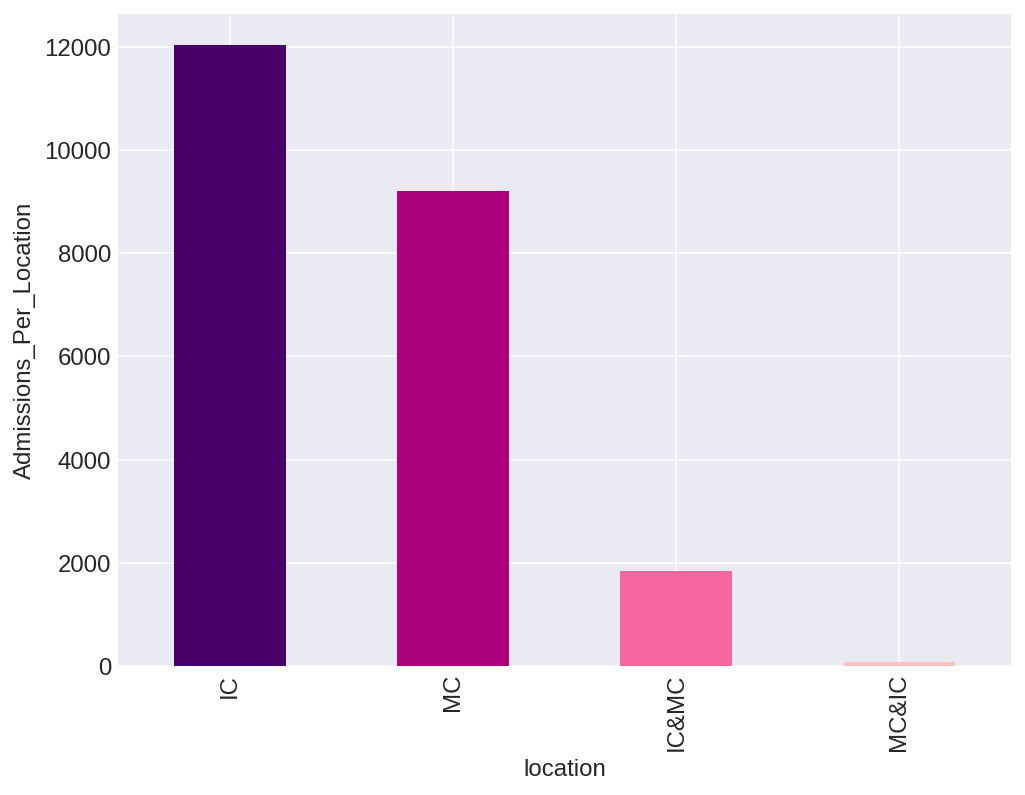

In [0]:
sql = """
SELECT 
    location,
    COUNT(admissionid) AS Admissions_Per_Location
FROM admissions
GROUP BY location
ORDER BY Admissions_Per_Location DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])

## <a id='urgency'></a>Urgency

``` mysql

SELECT 
    CASE 
        WHEN urgency = 1 THEN 'Unplanned' 
        WHEN urgency = 0 THEN 'Planned' 
        ELSE 'N/A' 
        END AS Urgency,
    COUNT(admissionid) AS Number_of_Admissions
FROM admissions
GROUP BY Urgency
ORDER BY Number_of_Admissions DESC

```

[Text(0, 0.5, 'Number_of_Admissions')]

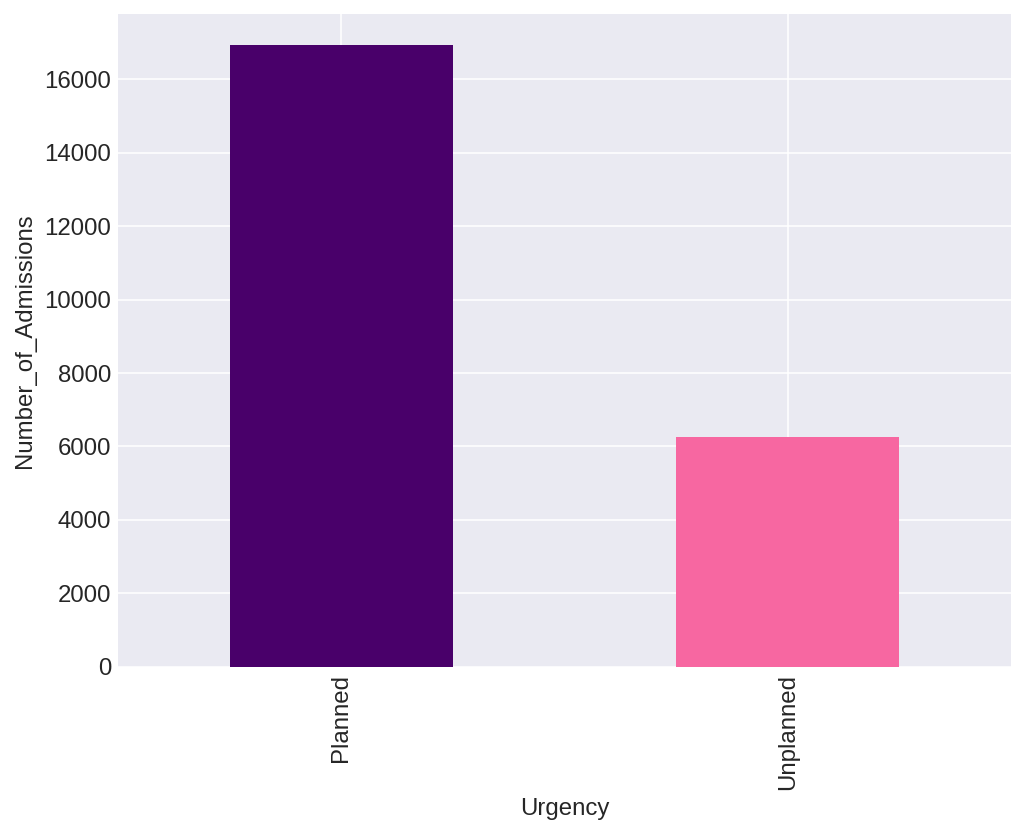

In [0]:
sql = """
SELECT 
    CASE 
        WHEN urgency = 1 THEN 'Unplanned' 
        WHEN urgency = 0 THEN 'Planned' 
        ELSE 'N/A' 
        END AS Urgency,
    COUNT(admissionid) AS Number_of_Admissions
FROM admissions
GROUP BY Urgency
ORDER BY Number_of_Admissions DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])

## <a id='origin'></a>Origin

``` mysql

SELECT 
    origin as Origin,
    COUNT(admissionid) as Number_of_Admissions
FROM admissions
GROUP BY origin
ORDER BY Number_of_Admissions DESC

```

[Text(0, 0.5, 'Number_of_Admissions')]

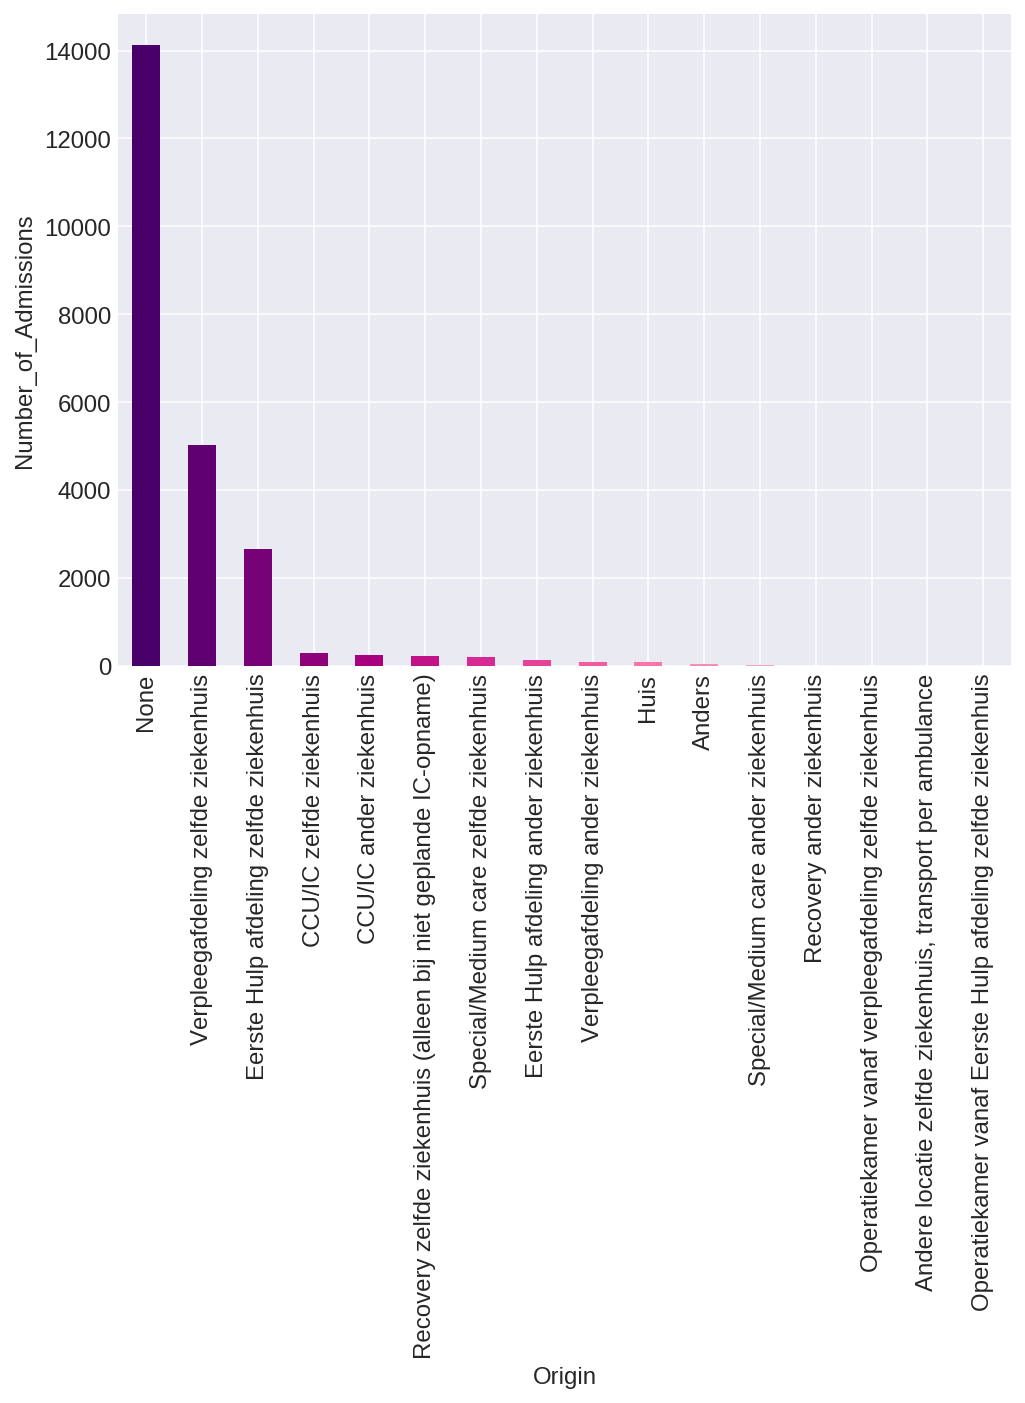

In [0]:
sql = """
SELECT 
    origin as Origin,
    COUNT(admissionid) as Number_of_Admissions
FROM admissions
GROUP BY origin
ORDER BY Number_of_Admissions DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])

## <a id='destination'></a>Destination

``` mysql

SELECT 
    destination as Destination,
    COUNT(admissionid) as Number_of_Admissions
FROM admissions
GROUP BY destination
ORDER BY Number_of_Admissions DESC

```

[Text(0, 0.5, 'Number_of_Admissions')]

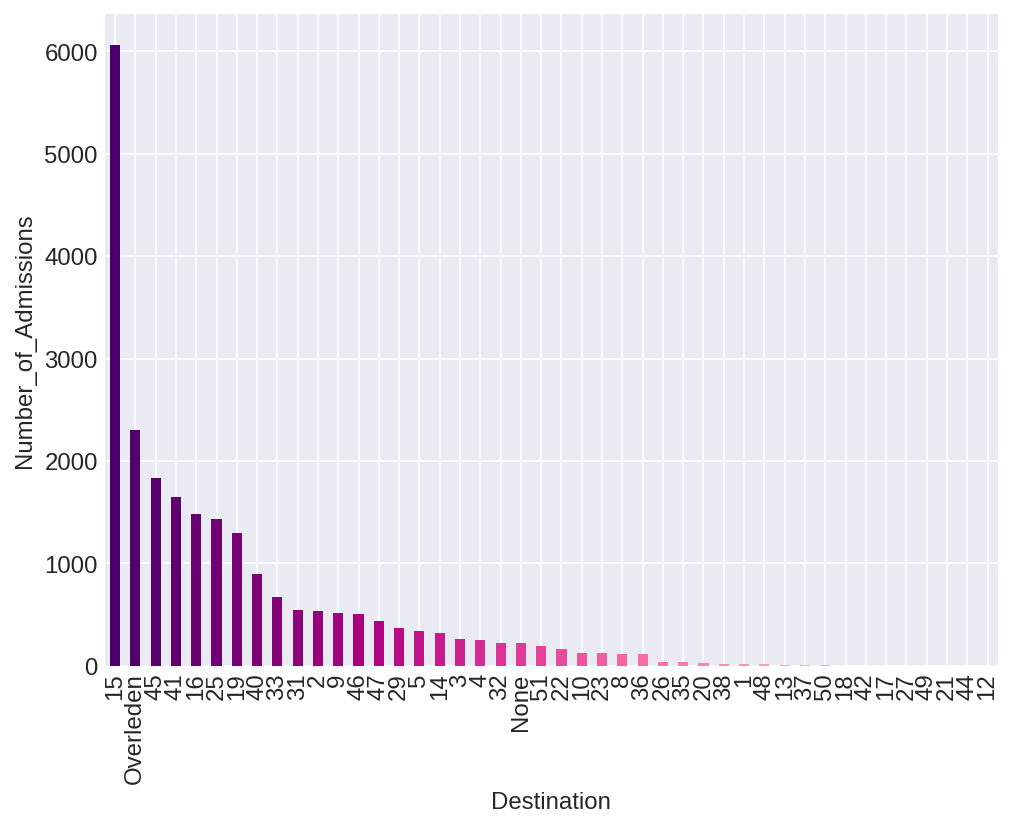

In [0]:
sql = """
SELECT 
    destination as Destination,
    COUNT(admissionid) as Number_of_Admissions
FROM admissions
GROUP BY destination
ORDER BY Number_of_Admissions DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,rot=90,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])

In [0]:
sql = """
SELECT COUNT(DISTINCT patientid) AS Total_Number_of_Patients, Min(patientid) AS FirstID, Max(patientid) AS LastID
FROM admissions
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT COUNT(DISTINCT patientid) AS Total_Number_of_Patients, Min(patientid) AS FirstID, Max(patientid) AS LastID
FROM admissions

```

,Total_Number_of_Patients,FirstID,LastID
0,20127,0,20326


In [0]:
sql = """
SELECT DISTINCT destination
FROM admissions
ORDER BY destination
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT DISTINCT destination
FROM admissions
ORDER BY destination

```

,destination
0,None
1,1
2,10
3,12
4,13
...,...
39,50
40,51
41,8
42,9


In [0]:
sql = """
--total number of ICU admissions
SELECT COUNT(DISTINCT admissionid) AS Total_number_of_admissions
FROM admissions
    """
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df


``` mysql

--total number of ICU admissions
SELECT COUNT(DISTINCT admissionid) AS Total_number_of_admissions
FROM admissions
    
```

,Total_number_of_admissions
0,23172


In [0]:
sql = """
--patients that expired on the ICU
SELECT COUNT(admissionid) AS Number_of_deaths_during_ICU_admission
FROM admissions
WHERE destination = 'Overleden'
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

--patients that expired on the ICU
SELECT COUNT(admissionid) AS Number_of_deaths_during_ICU_admission
FROM admissions
WHERE destination = 'Overleden'

```

,Number_of_deaths_during_ICU_admission
0,2302


In [0]:
sql = """
SELECT admissionid
  FROM admissions
  WHERE location = 'IC' or location = 'IC&MC'
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT admissionid
  FROM admissions
  WHERE location = 'IC' or location = 'IC&MC'

```

,admissionid
0,178
1,179
2,197
3,396
4,769
5,991
6,998
7,1031
8,1607
9,1660


## <a id='admissionyeargroup'></a>Admission year group

``` mysql

SELECT admissionyeargroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY admissionyeargroup
ORDER BY admissionyeargroup ASC

```

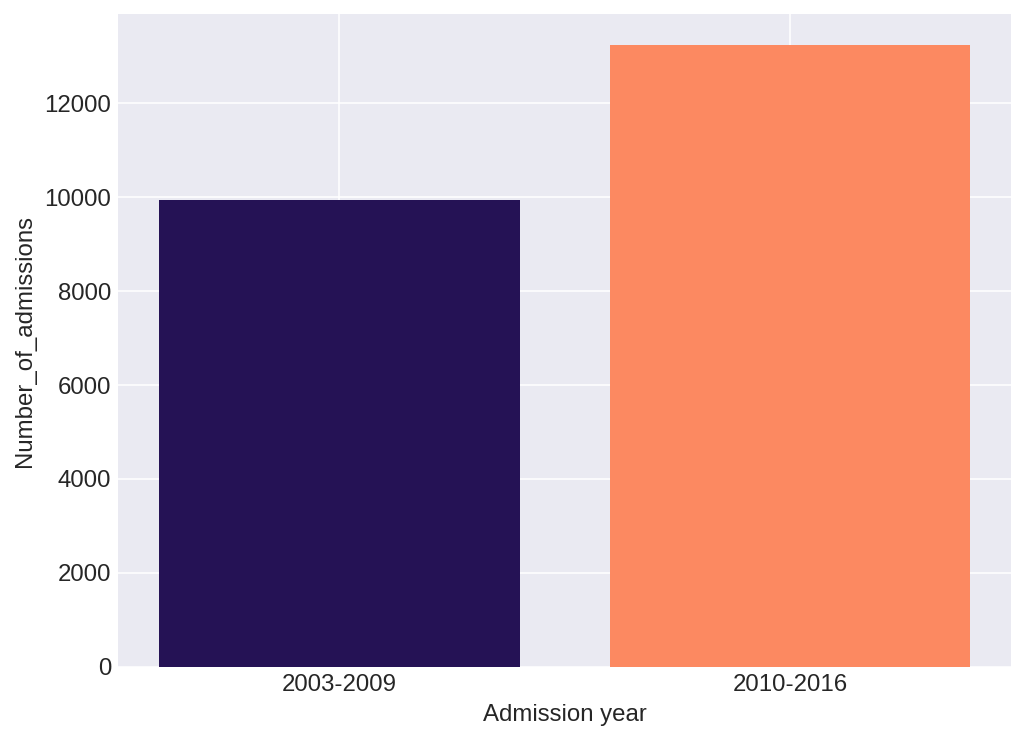

In [0]:
sql = """
SELECT admissionyeargroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY admissionyeargroup
ORDER BY admissionyeargroup ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

labels = df.iloc[:,0]
x = np.arange(len(labels))
y = df.iloc[:,1]

fig, ax = plt.subplots()
bars = ax.bar(x,y)
patches = bars.patches

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set(ylabel=df.columns[1])
ax.set(xlabel='Admission year')

cm = plt.cm.get_cmap('magma')

#To normalize values
col = (y-y.min())/(y.max()-y.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(0.15+0.6*c))

## <a id='gender'></a>Gender

In [0]:
sql = """
SELECT 
    CASE
        WHEN Gender = 'Man' THEN 'Male'
        WHEN Gender = 'Vrouw' THEN 'Female'
        ELSE 'N/A'
    END AS Gender
    , COUNT(*) AS Number_of_patients -- COUNT(*) counts everything including NULL
FROM admissions
WHERE AdmissionCOUNT = 1
GROUP BY Gender
ORDER BY Number_of_patients DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT 
    CASE
        WHEN Gender = 'Man' THEN 'Male'
        WHEN Gender = 'Vrouw' THEN 'Female'
        ELSE 'N/A'
    END AS Gender
    , COUNT(*) AS Number_of_patients -- COUNT(*) counts everything including NULL
FROM admissions
WHERE AdmissionCOUNT = 1
GROUP BY Gender
ORDER BY Number_of_patients DESC

```

,Gender,Number_of_patients
0,Male,12807
1,Female,6849
2,N/A,471


``` mysql

SELECT 
    CASE
        WHEN Gender = 'Man' THEN 'Male'
        WHEN Gender = 'Vrouw' THEN 'Female'
        ELSE 'N/A'
    END AS Gender
    , COUNT(*) AS Number_of_patients -- COUNT(*) counts everything including NULL
FROM admissions
WHERE AdmissionCOUNT = 1
GROUP BY Gender
ORDER BY Number_of_patients DESC

```

[Text(0, 0.5, 'Number_of_patients')]

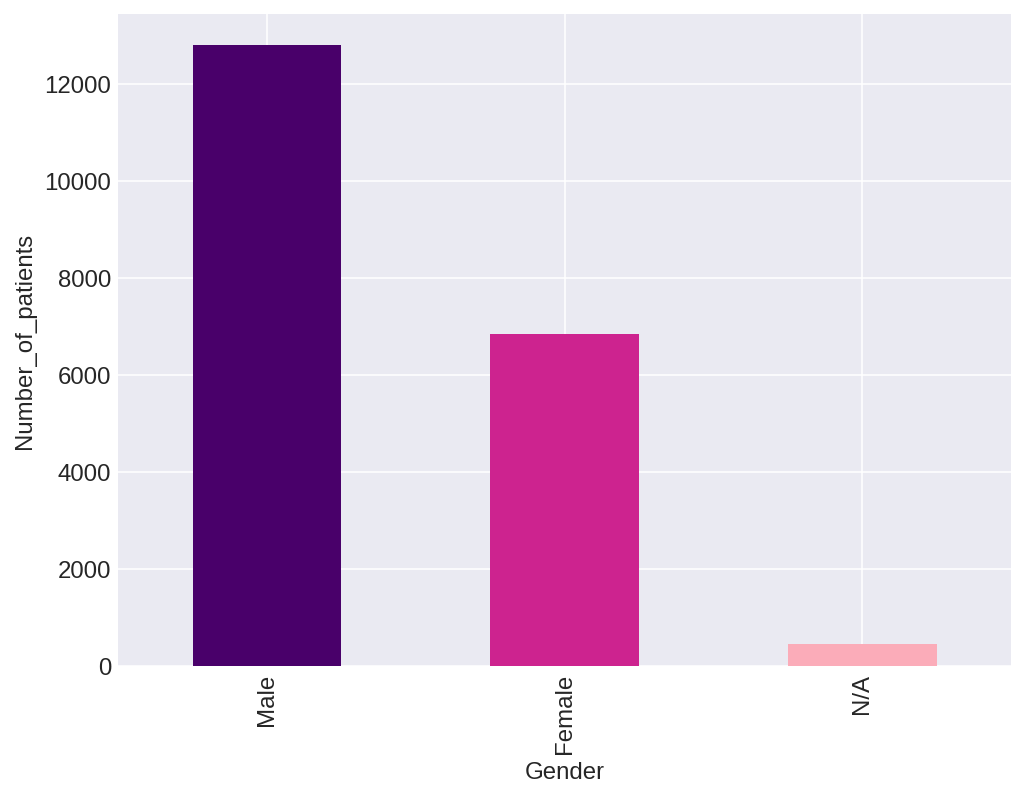

In [0]:
sql = """
SELECT 
    CASE
        WHEN Gender = 'Man' THEN 'Male'
        WHEN Gender = 'Vrouw' THEN 'Female'
        ELSE 'N/A'
    END AS Gender
    , COUNT(*) AS Number_of_patients -- COUNT(*) counts everything including NULL
FROM admissions
WHERE AdmissionCOUNT = 1
GROUP BY Gender
ORDER BY Number_of_patients DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])

## <a id='agegroup'></a>Age Groups

In [0]:
sql = """
SELECT agegroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY agegroup
ORDER BY agegroup ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT agegroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY agegroup
ORDER BY agegroup ASC

```

,agegroup,Number_of_admissions
0,18-39,2557
1,40-49,2200
2,50-59,3964
3,60-69,6097
4,70-79,6085
5,80+,2269


``` mysql

SELECT agegroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY agegroup
ORDER BY agegroup ASC

```

[Text(0.5, 0, 'Age')]

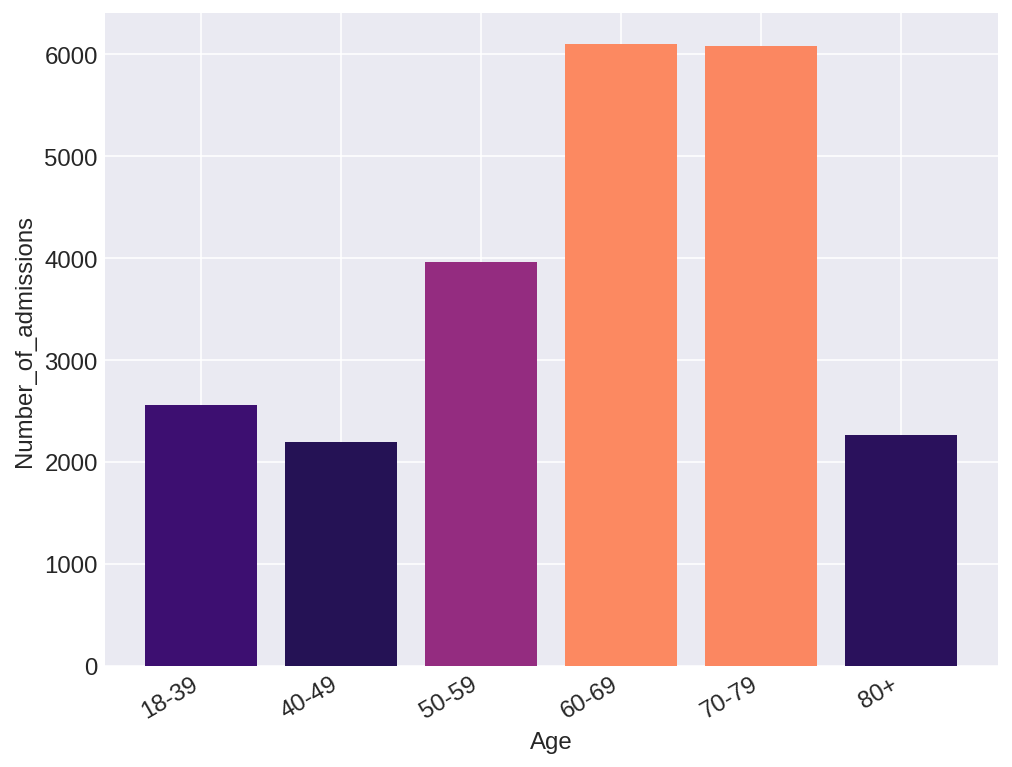

In [0]:
sql = """
SELECT agegroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY agegroup
ORDER BY agegroup ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

labels = df.iloc[:,0]
x = np.arange(len(labels))
y = df.iloc[:,1]

fig, ax = plt.subplots()
bars = ax.bar(x,y)
patches = bars.patches

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, horizontalalignment='right')

cm = plt.cm.get_cmap('magma')

#To normalize your values
col = (y-y.min())/(y.max()-y.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(0.15+0.6*c))
    
ax.set(ylabel=df.columns[1])
ax.set(xlabel='Age')

``` mysql

SELECT agegroup
    ,CASE
        WHEN destination = 'Overleden' THEN 1
        ELSE 0
    END AS died
FROM admissions
ORDER BY agegroup ASC

```

Text(0.5, 1.0, 'Age distribution of Alive vs death at ICU discharge')

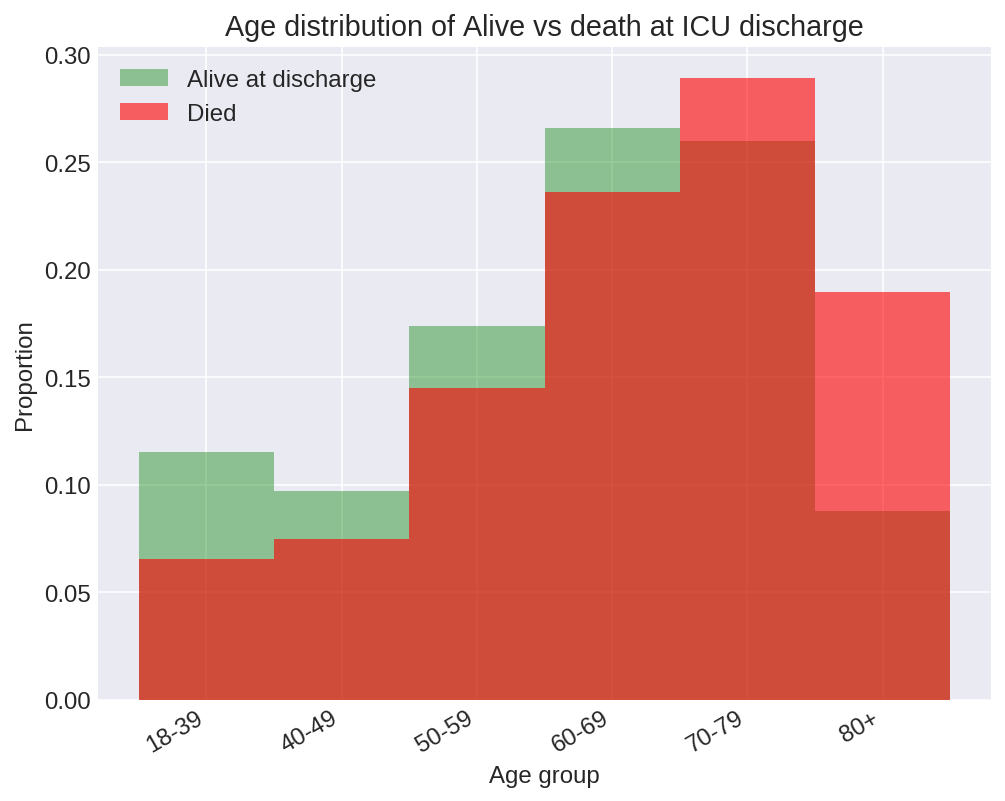

In [0]:
sql = """
SELECT agegroup
    ,CASE
        WHEN destination = 'Overleden' THEN 1
        ELSE 0
    END AS died
FROM admissions
ORDER BY agegroup ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

alive = df[df['died'] == 0].groupby(['agegroup']).count()
died = df[df['died'] == 1].groupby(['agegroup']).count()

labels = alive.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
bars1 = ax.bar(x,alive.iloc[:,0]/np.sum(alive.iloc[:,0]), width=1.0, facecolor='g', alpha=0.40, label='Alive at discharge')
bars2 = ax.bar(x,died.iloc[:,0]/np.sum(died.iloc[:,0]), width=1.0, facecolor='r', alpha=0.60, label='Died')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, horizontalalignment='right')
ax.legend()

ax.set_ylabel('Proportion')
ax.set_xlabel('Age group')
ax.set_title('Age distribution of Alive vs death at ICU discharge')

## <a id='Weightgroup'></a>weightgroup

``` mysql

SELECT 
    CASE WHEN weightgroup IS NULL THEN 'N/A'
    ELSE weightgroup
    END as weightgroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY weightgroup
ORDER BY CAST (REGEXP_EXTRACT(weightgroup, '^[0-9]+') AS INT64) ASC

```

[Text(0.5, 0, 'Weight')]

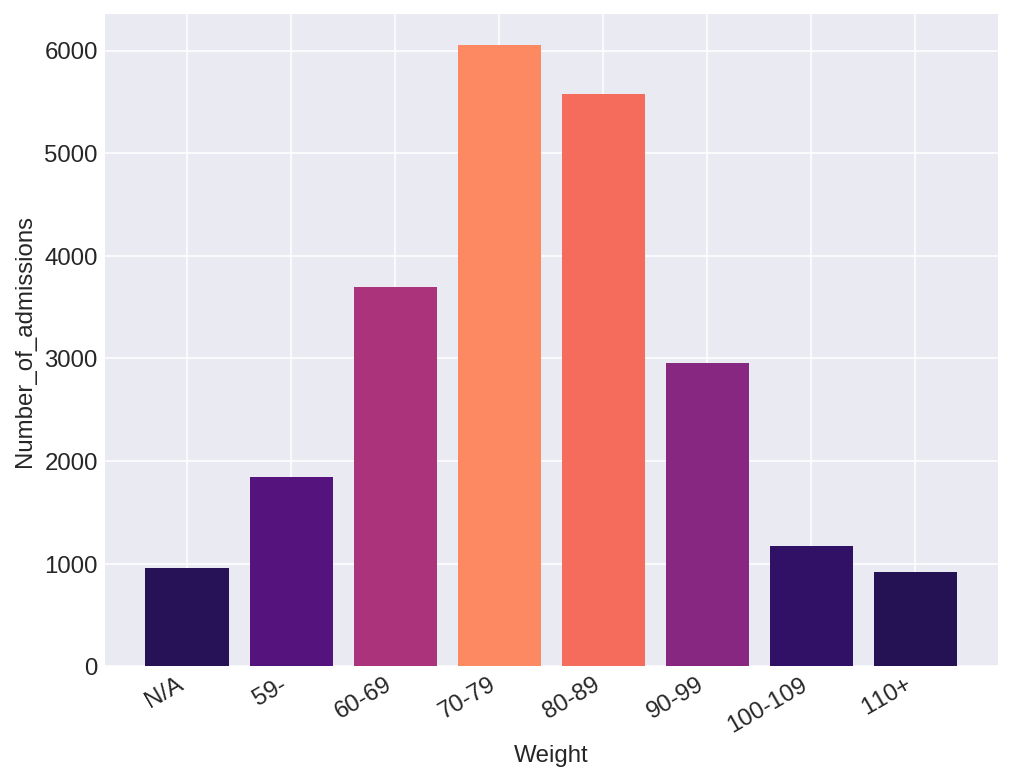

In [0]:
sql = """
SELECT 
    CASE WHEN weightgroup IS NULL THEN 'N/A'
    ELSE weightgroup
    END as weightgroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY weightgroup
ORDER BY CAST (REGEXP_EXTRACT(weightgroup, '^[0-9]+') AS INT64) ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

labels = df.iloc[:,0]
x = np.arange(len(labels))
y = df.iloc[:,1]

fig, ax = plt.subplots()
bars = ax.bar(x,y)
patches = bars.patches

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, horizontalalignment='right')

cm = plt.cm.get_cmap('magma')

#To normalize your values
col = (y-y.min())/(y.max()-y.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(0.15+0.6*c))
    
ax.set(ylabel=df.columns[1])
ax.set(xlabel='Weight')

## <a id='heightgroup'></a>heightgroup

``` mysql

SELECT 
    CASE WHEN heightgroup IS NULL THEN 'N/A'
    ELSE heightgroup
    END as heightgroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY heightgroup
ORDER BY CAST (REGEXP_EXTRACT(heightgroup, '^[0-9]+') AS INT64) ASC

```

[Text(0.5, 0, 'Height')]

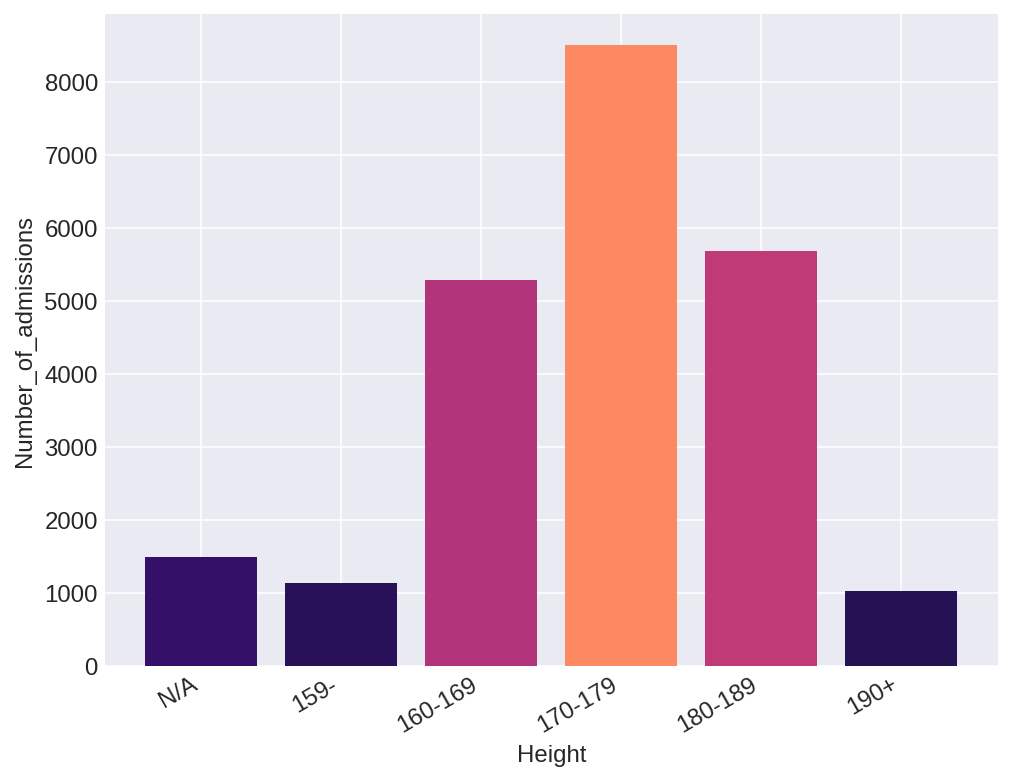

In [0]:
sql = """
SELECT 
    CASE WHEN heightgroup IS NULL THEN 'N/A'
    ELSE heightgroup
    END as heightgroup
    , COUNT(*) AS Number_of_admissions -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY heightgroup
ORDER BY CAST (REGEXP_EXTRACT(heightgroup, '^[0-9]+') AS INT64) ASC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

labels = df.iloc[:,0]
x = np.arange(len(labels))
y = df.iloc[:,1]

fig, ax = plt.subplots()
bars = ax.bar(x,y)
patches = bars.patches

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, horizontalalignment='right')

cm = plt.cm.get_cmap('magma')

#To normalize your values
col = (y-y.min())/(y.max()-y.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(0.15+0.6*c))
    
ax.set(ylabel=df.columns[1])
ax.set(xlabel='Height')

## <a id='specialty'></a>Medical specialty

In [0]:
sql = """
SELECT Specialty
    , COUNT(*) as Admissions_Per_Specialty -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY specialty
ORDER BY Admissions_Per_Specialty DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT Specialty
    , COUNT(*) as Admissions_Per_Specialty -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY specialty
ORDER BY Admissions_Per_Specialty DESC

```

,Specialty,Admissions_Per_Specialty
0,Cardiochirurgie,7419
1,Neurochirurgie,2530
2,Vaatchirurgie,1452
3,Inwendig,1367
4,Cardiologie,1336
...,...,...
23,Mondheelkunde,20
24,Verloskunde,16
25,Obstetrie,15
26,Oogheelkunde,5


``` mysql

SELECT Specialty
    , COUNT(*) AS Admissions_per_Specialty -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY Specialty
ORDER BY Admissions_per_Specialty DESC

```

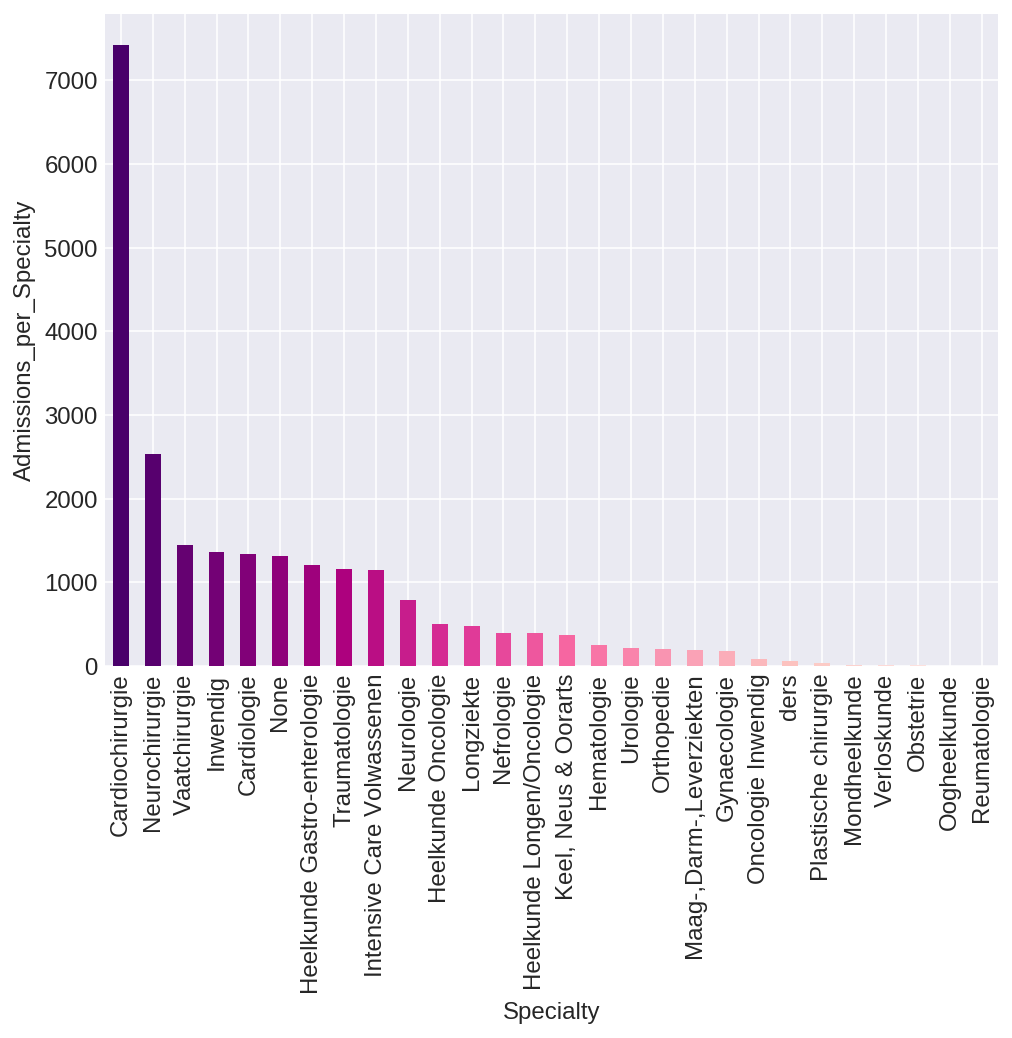

In [0]:
sql = """
SELECT Specialty
    , COUNT(*) AS Admissions_per_Specialty -- COUNT(*) counts everything including NULL
FROM admissions
GROUP BY Specialty
ORDER BY Admissions_per_Specialty DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ylabel = ax.set(ylabel=df.columns[1])